<font size=5 face="Comic Sans MS,arial,verdana"><font color="white">Introduccion :
En este proeyecto realizaremos la comparacion de un portafolio de 4 activos mediante la "frontera eficiente" realizada por los "métodos" de Markowitz y Monte'Carlo 
</font></font>

# Paquetes Necesarios

Como primer paso instalaremos algunas dependencias par apoder trabajar con ellas

In [ ]:
pip install ffn #Instalamos la libreria ffn para utilizar herramientas cuantitativas financieras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install yfinance #Instalamos la libreria de yahoo finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.4 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install yfinance --upgrade --no-cache-dir #Hacemos la actualizacion de la libreria para deshabilitar la memoria cache

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import pandas as pd
import ffn
%matplotlib inline
#Importamos todas las librerias requeridas para trabajar con los datos y formatos de fechas
import datetime as dt 
#from datetime import datetime
from datetime import datetime, timedelta 
date = dt.datetime.now()
modified_date = date - timedelta(days=1)
e_= dt.datetime.strftime(modified_date, "%Y-%m-%d")
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import warnings
plt.style.use('dark_background')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
class bcolors:
    OK = '\033[92m' #GREEN
    WARNING = '\033[93m' #YELLOW
    FAIL = '\033[91m' #RED
    RESET = '\033[0m' #RESET COLOR

# Datos y visualizaciones de ayuda

En primera instancia optamos por trabajar con yahoo finance , depsues de investigar un poco decidimos optar por la api mostrada en las siguiente celda

In [ ]:
yf.pdr_override()

msft = yf.Ticker("MSFT")

# Obtenemos los datos de mercado 
hist = msft.history(period="max")

en yahoo finance mostramos los datos que nos arrojan , las tipicas columnas de precios 

In [ ]:
hist.head() #Vemos los primeros registros

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055653,0.063838,0.055653,0.061109,1031788800,0.0,0.0
1986-03-14,0.061109,0.064383,0.061109,0.063292,308160000,0.0,0.0
1986-03-17,0.063292,0.064929,0.063292,0.064384,133171200,0.0,0.0
1986-03-18,0.064384,0.064929,0.062201,0.062746,67766400,0.0,0.0
1986-03-19,0.062746,0.063292,0.061109,0.061655,47894400,0.0,0.0


esta es suna funcion que me arroja 4 diferentes activos y de ellos me da un precio en especifico

In [ ]:
#Creamos nuestro objeto portafolio con los precios de cierre y los ordenamos con todos los registros que tenemos
def get_data(stocks_symbols, start):
  portafolio = pd.DataFrame()
  for i, stock in enumerate(stocks_symbols):
    portafolio[stock] = yf.Ticker(stock).history(period="max")["Close"].sort_index().loc[start:]
  return portafolio

#Elegimos nuestras acciones, en este caso serán APPLE, MICROSOFT, AMAZON y GOOGLE
stocks_symbols = ["AAPL", "MSFT","AMZN","GOOGL"]
df = get_data(stocks_symbols, "01-01-2010")

nuestros activos son apple , microsoft,amazon y google

In [ ]:
print(df) #Mostramos nuestos datos

                  AAPL        MSFT         AMZN        GOOGL
Date                                                        
2010-01-04    6.535084   23.800220   133.899994   313.688690
2010-01-05    6.546384   23.807915   134.690002   312.307312
2010-01-06    6.442256   23.661800   132.250000   304.434448
2010-01-07    6.430344   23.415731   130.000000   297.347351
2010-01-08    6.473096   23.577219   133.520004   301.311310
...                ...         ...          ...          ...
2022-05-23  143.110001  260.649994  2151.139893  2229.760010
2022-05-24  140.360001  259.619995  2082.000000  2119.399902
2022-05-25  140.520004  262.519989  2135.500000  2116.100098
2022-05-26  143.779999  265.899994  2221.550049  2155.850098
2022-05-27  149.639999  273.239990  2302.929932  2246.330078

[3123 rows x 4 columns]


A continuacion mostraremos los rendimientos d enuetrsos diferentes activos a lo largo del tiempo

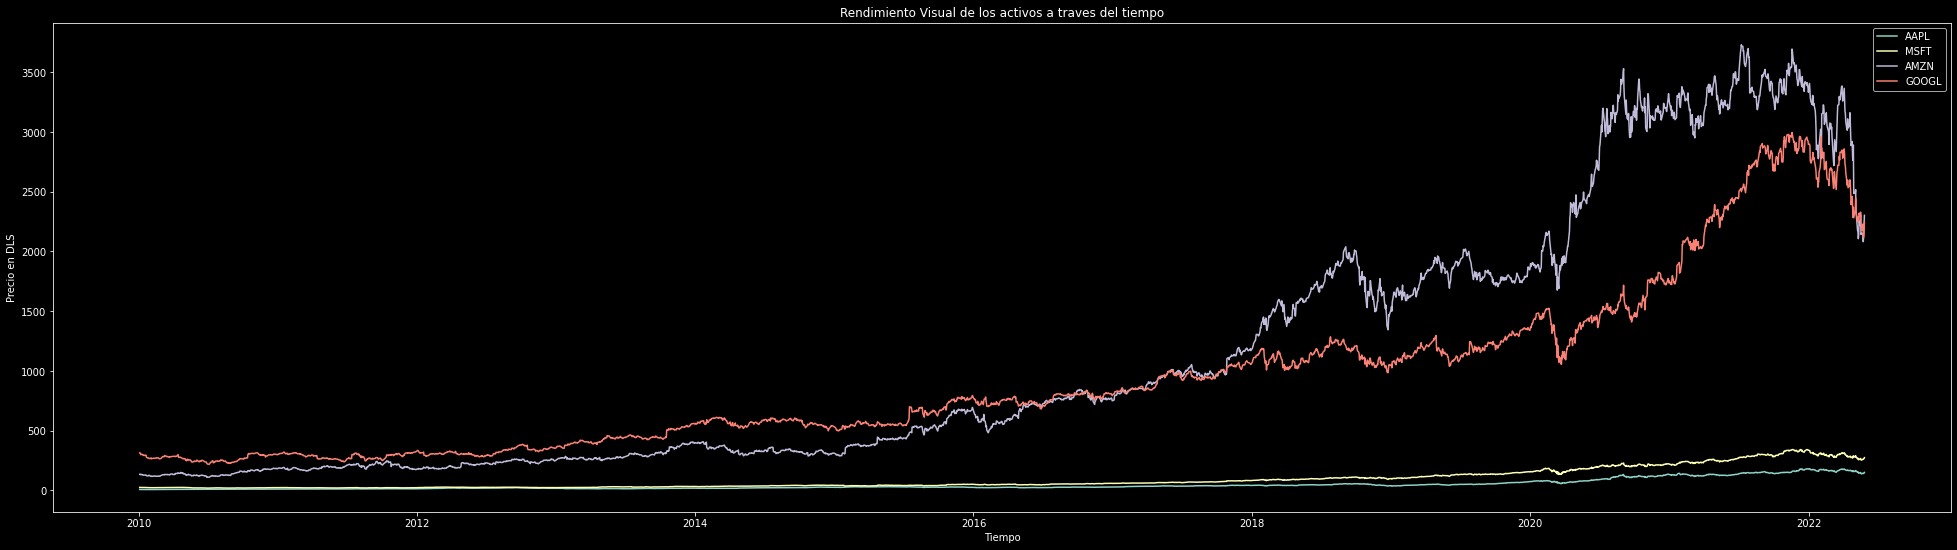

In [ ]:
#Graficamos nuestros rendimientos a lo largo del tiempo con las etiquetas correspondientes
import matplotlib.pyplot as plt
plt.plot(df)
plt.rcParams["figure.figsize"] = (12,5)
plt.title("Rendimiento Visual de los activos a traves del tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Precio en DLS")
plt.legend(['AAPL','MSFT','AMZN','GOOGL'])
plt.show()

Hacemos el import de ffn ya que la ocuparemos y queriamos destacar su uso


de igual manera que con yfinance ocupamos o mandamos a traer los precios de nuestros activos 
P>D mostramos un benchmark que no se ocupara pero no lo quitamos

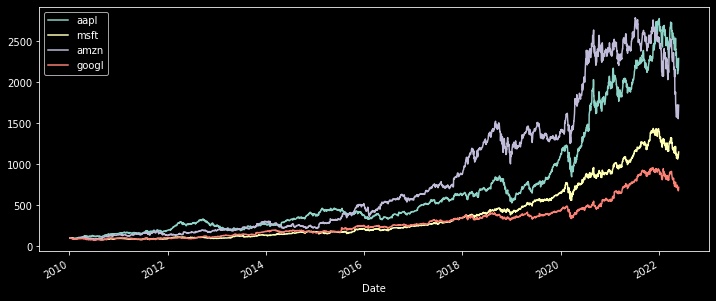

In [ ]:

import ffn
prices = ffn.get('AAPL,MSFT,AMZN,GOOGL', start='2010-01-01')
benchmark = ffn.get('spy', start='2010-01-01')
ax = prices.rebase().plot(figsize=(12,5))


mostramos los histogramas de retornos de nuestros activos

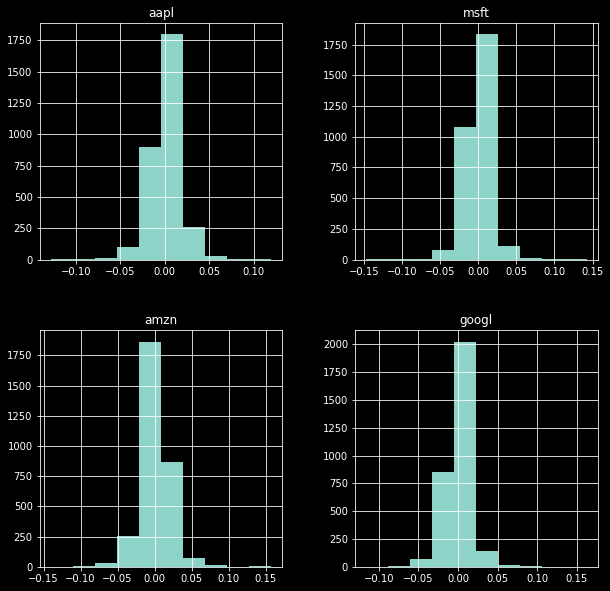

In [ ]:
returns = prices.to_returns().dropna() #Eliminamos de nuestros registros los NA para tener datos concizos, en este caso como las acciones cotizan en el mismo
#mercado, se mantiene la consistencia de fechas con respecto a los rendimientos ya que los días que no hay cotizaciones es igual para todos, en caso de que contemplaramos mercados 
#de diferentes países habría que emparejar las fechas correspondientes
ax = returns.hist(figsize=(10,10)) #graficamos los rendimientos del portafolio

una de las ventajas de finantial functions for python es la posibilidad de mostrar algunas estadisticas , por lo que llamamos un método y nos muetsra una serie de caracteristicas dd nuestros activos.

In [ ]:
stats = prices.calc_stats() #Hacemos un calculo general de estadisiticas de informacion de nuestros datos
stats.display()#Mostramos los datos


Stat                 aapl        msft        amzn        googl
-------------------  ----------  ----------  ----------  ----------
Start                2010-01-04  2010-01-04  2010-01-04  2010-01-04
End                  2022-05-27  2022-05-27  2022-05-27  2022-05-27
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         2189.79%    1048.06%    1619.89%    616.10%
Daily Sharpe         1.03        0.90        0.87        0.74
Daily Sortino        1.72        1.50        1.48        1.23
CAGR                 28.75%      21.77%      25.81%      17.22%
Max Drawdown         -43.80%     -28.04%     -44.20%     -30.87%
Calmar Ratio         0.66        0.78        0.58        0.56

MTD                  -4.94%      -1.31%      -7.35%      -1.57%
3m                   -9.09%      -7.88%      -25.13%     -16.47%
6m                   -4.31%      -16.75%     -34.29%     -21.01%
YTD                  -15.50%     -18.40%     -30.93%     -22.46%
1Y                   20.13%  

<font size=5 face="Comic Sans MS,arial,verdana">Tenemos al dia de 22 de abril un aumento porcentual bastante intuitivo de nuestros activos <font color="green">AAPL=2372.08% MSFT=1048.70% AMZN=2056.09% GOOGL=66.77%</font>  lo que nos da una probada de la rentabilidad de los activos y su crecimiento </font>

## Drawdown

El drawdown es el retroceso de la curva de resultados desde el máximo anterior de referencia hasta el mínimo durante un período determinado.

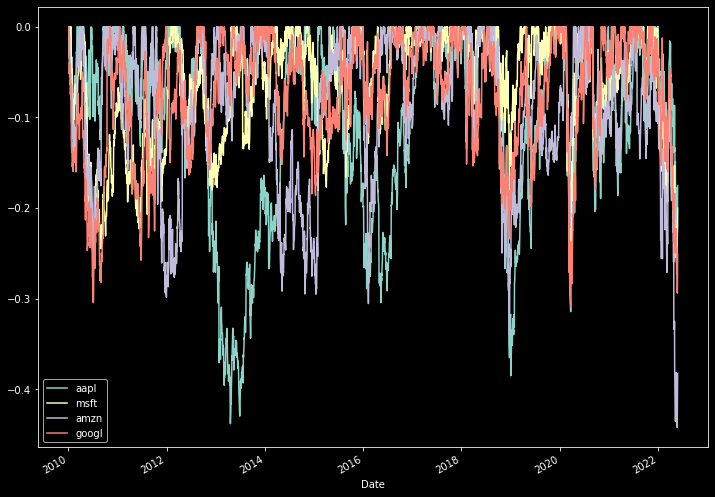

In [ ]:
ax = stats.prices.to_drawdown_series().plot(figsize=(12,9)) #Graficamos el drwdown 


Crecimiento anual

In [ ]:
stats.prices.calc_cagr() #Calculamos la tasa de crecimiento anual

aapl     0.287467
msft     0.217698
amzn     0.258072
googl    0.172187
dtype: float64

Varianza

In [ ]:
returns = prices.to_log_returns().dropna() #Eliminamos los datos faltantes, que fueron los días que no cotizó la bolsa
returns.calc_mean_var_weights().as_format('.2%')#Calculamos los pesos de las varianzas medias

aapl     51.36%
msft     26.84%
amzn     21.80%
googl     0.00%
dtype: object

# Curtosis , media , sesgo 

In [ ]:
returns.mean() #Calculamos el promedio de los retornos 

aapl     0.001003
msft     0.000782
amzn     0.000911
googl    0.000631
dtype: float64

In [ ]:
from scipy.stats import norm, kurtosis
kurtosis(returns) #Calculamos la kurtosis de nuestro portafolio, vemos que todos los valores son mayores a 3, lo que indica una
#curtosis positiva por lo que entendemos que existe una concentración de datos en la media mayores a las de una normal

array([5.74556597, 9.20843185, 6.90230288, 8.80871195])

In [ ]:
prices #Mostramos los precios de las acciones de nuestro portafolio

,aapl,msft,amzn,googl
Date,,,,
2010-01-04,6.535085,23.800215,133.899994,313.688690
2010-01-05,6.546383,23.807915,134.690002,312.307312
2010-01-06,6.442255,23.661806,132.250000,304.434448
2010-01-07,6.430345,23.415726,130.000000,297.347351
2010-01-08,6.473095,23.577217,133.520004,301.311310
...,...,...,...,...
2022-05-23,143.110001,260.649994,2151.139893,2229.760010
2022-05-24,140.360001,259.619995,2082.000000,2119.399902
2022-05-25,140.520004,262.519989,2135.500000,2116.100098


<font size=5 face="Comic Sans MS,arial,verdana"><font color="pink">A pesar del crecimiento exponencial de otras empresas al dia mas reciente que tenemos podemos apreciar a Amazon y Google en respectiva al precio de acciones esta por encima del otro par</font></font>

In [ ]:
#Eliminamos los elementos sin registro, para tener consistencia con nuestros datos y les calculamos la media
#Al comparar estos resultados con el anterior vemos que efectivamente existe un cambio al eliminar estos registros, asi que consideraremos estos registros
#para los siguientes puntos
returns_wlog = prices.to_returns().dropna()
mean_returns=returns_wlog.mean() 
returns_wlog.mean() 


aapl     0.001163
msft     0.000911
amzn     0.001116
googl    0.000767
dtype: float64

In [ ]:
print(returns_wlog)#Los volvemos a imprimir 

                aapl      msft      amzn     googl
Date                                              
2010-01-05  0.001729  0.000324  0.005900 -0.004404
2010-01-06 -0.015906 -0.006137 -0.018116 -0.025209
2010-01-07 -0.001849 -0.010400 -0.017013 -0.023280
2010-01-08  0.006648  0.006897  0.027077  0.013331
2010-01-11 -0.008821 -0.012720 -0.024041 -0.001512
...              ...       ...       ...       ...
2022-05-23  0.040119  0.032032 -0.000316  0.023690
2022-05-24 -0.019216 -0.003952 -0.032141 -0.049494
2022-05-25  0.001140  0.011170  0.025696 -0.001557
2022-05-26  0.023200  0.012875  0.040295  0.018785
2022-05-27  0.040757  0.027604  0.036632  0.041970

[3122 rows x 4 columns]


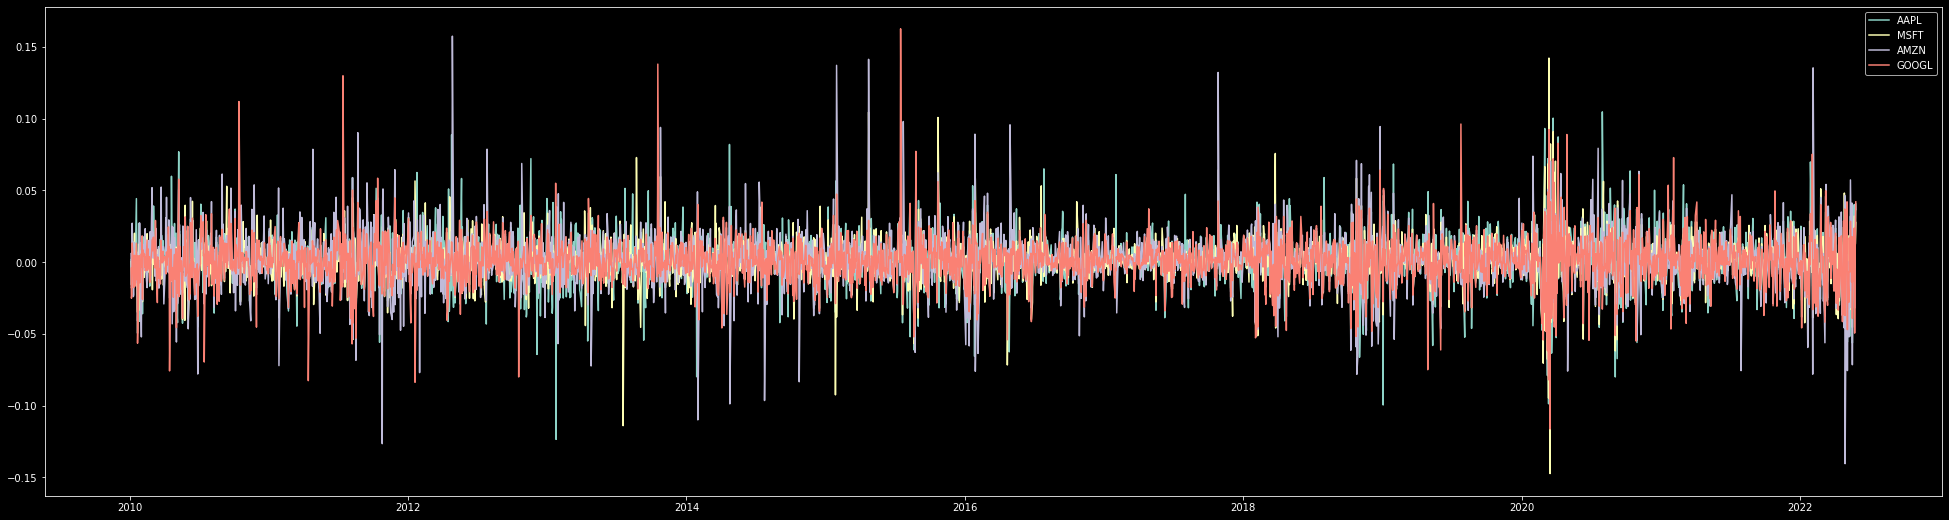

In [ ]:
plt.plot(returns_wlog)
plt.rcParams["figure.figsize"] = (20,10)
plt.legend(['AAPL','MSFT','AMZN','GOOGL'])

In [ ]:
kurtosis(returns_wlog) #Calculamos la Curtosis ahora de los registros ya limpios y notamos que siguen siendo mayor a 3, es decir positivos
#es de esperarse que aumente ya que sin eliminar los registros se le consideraban como retornos con valor de 0, seguimos teniendo que todos presentan
#una clara concentración de los datos alrededor de la media

array([5.43026279, 8.74648282, 7.17331451, 9.90127485])

In [ ]:
import scipy.stats as sp
sp.skew(returns_wlog)

array([-0.09237928,  0.01741761,  0.2555296 ,  0.50034406])

<font size=5 face="Comic Sans MS,arial,verdana"><font color="coral">Calcuamos la volatilidad, notemos que la volatilidad en acciones como Amazon y Google, es alta , mientras en las acciones de Apple y Microsoft es baja
</font></font>

<font size=5 face="Comic Sans MS,arial,verdana"><font color="orange">Desempeño
</font></font>

In [ ]:
perf = prices.calc_stats()

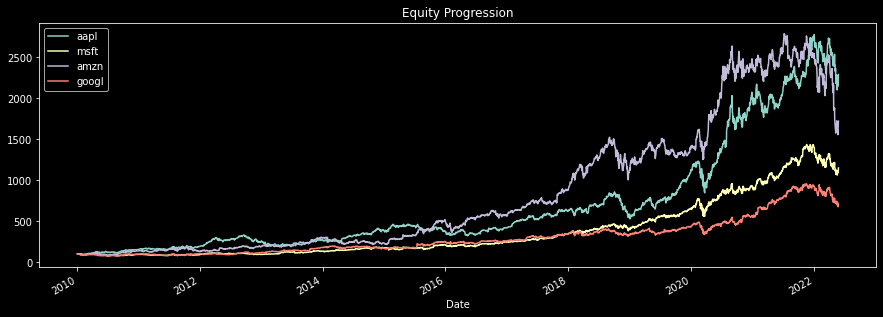

In [ ]:
perf.plot()

In [ ]:
returns_wlog.calc_mean_var_weights().as_format('.2%')

aapl     49.57%
msft     24.75%
amzn     25.68%
googl     0.00%
dtype: object

In [ ]:
#Calculamos el VaR al 95%, 97.5% y 99%, considerando los precios de cierre de las acciones sin datos faltantes, lo mismo para
#el CVaR que es la media de las observaciones del periodo a los mismos niveles de confianza 95%, 97.5% y 99.99%
#Var 95 97.5 99
import numpy as np
x_var_95 = np.percentile(returns_wlog,5)
print(x_var_95)

x_var_975 = np.percentile(returns_wlog,2.5)
print(x_var_975)

x_var_99 = np.percentile(returns_wlog,1)
print(x_var_99)
#CVar 95 97.5 99
np.mean(returns_wlog[returns_wlog <= x_var_95])
np.mean(returns_wlog[returns_wlog <= x_var_975])
np.mean(returns_wlog[returns_wlog <= x_var_99])


-0.026053764781884925
-0.03498090434686092
-0.0468202890032114


aapl    -0.065760
msft    -0.070338
amzn    -0.067618
googl   -0.061190
dtype: float64

In [ ]:
#fijamos una ventana de 252 dıas y calculamos su media
rolling=returns_wlog.rolling(window=252).mean()

In [ ]:
print(rolling)#Mostramos nuestra ventana de 252 dias

                aapl      msft      amzn     googl
Date                                              
2010-01-05       NaN       NaN       NaN       NaN
2010-01-06       NaN       NaN       NaN       NaN
2010-01-07       NaN       NaN       NaN       NaN
2010-01-08       NaN       NaN       NaN       NaN
2010-01-11       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...
2022-05-23  0.000646  0.000329 -0.001340 -0.000072
2022-05-24  0.000576  0.000298 -0.001485 -0.000272
2022-05-25  0.000582  0.000346 -0.001390 -0.000307
2022-05-26  0.000723  0.000432 -0.001188 -0.000203
2022-05-27  0.000906  0.000535 -0.001034 -0.000027

[3122 rows x 4 columns]


In [ ]:
roll=rolling.dropna() #Eliminamos nuestros datos NA

In [ ]:
roll

,aapl,msft,amzn,googl
Date,,,,
2011-01-03,0.001856,-0.000224,0.001478,0.000009
2011-01-04,0.001870,-0.000209,0.001472,0.000012
2011-01-05,0.001966,-0.000198,0.001596,0.000158
2011-01-06,0.001970,-0.000040,0.001630,0.000279
2011-01-07,0.001972,-0.000098,0.001515,0.000245
...,...,...,...,...
2022-05-23,0.000646,0.000329,-0.001340,-0.000072
2022-05-24,0.000576,0.000298,-0.001485,-0.000272
2022-05-25,0.000582,0.000346,-0.001390,-0.000307


In [ ]:
ganancias=roll[roll>0] #Creamos la condicion para que se cumpla Ganancias, que sera cuando nuestro valor sea mayor que 0

In [ ]:
ganancias #Mostramos, dado que estamos utilizando la condicion >0 solo tendremos los registros que cumplan la condicion, los registros que
#no cumplan la condicion booleana estaran determinados por un Na

,aapl,msft,amzn,googl
Date,,,,
2011-01-03,0.001856,NaN,0.001478,0.000009
2011-01-04,0.001870,NaN,0.001472,0.000012
2011-01-05,0.001966,NaN,0.001596,0.000158
2011-01-06,0.001970,NaN,0.001630,0.000279
2011-01-07,0.001972,NaN,0.001515,0.000245
...,...,...,...,...
2022-05-23,0.000646,0.000329,NaN,NaN
2022-05-24,0.000576,0.000298,NaN,NaN
2022-05-25,0.000582,0.000346,NaN,NaN


In [ ]:
perdidas=roll[roll<0] #De igual manera creamos nuestra condicion para mostrar perdidas

In [ ]:
perdidas #Mostramos, dado que estamos utilizando la condicion <0 solo tendremos los registros que cumplan la condicion, los registros que
#no cumplan la condicion booleana estaran determinados por un Na

,aapl,msft,amzn,googl
Date,,,,
2011-01-03,NaN,-0.000224,NaN,NaN
2011-01-04,NaN,-0.000209,NaN,NaN
2011-01-05,NaN,-0.000198,NaN,NaN
2011-01-06,NaN,-0.000040,NaN,NaN
2011-01-07,NaN,-0.000098,NaN,NaN
...,...,...,...,...
2022-05-23,NaN,NaN,-0.001340,-0.000072
2022-05-24,NaN,NaN,-0.001485,-0.000272
2022-05-25,NaN,NaN,-0.001390,-0.000307


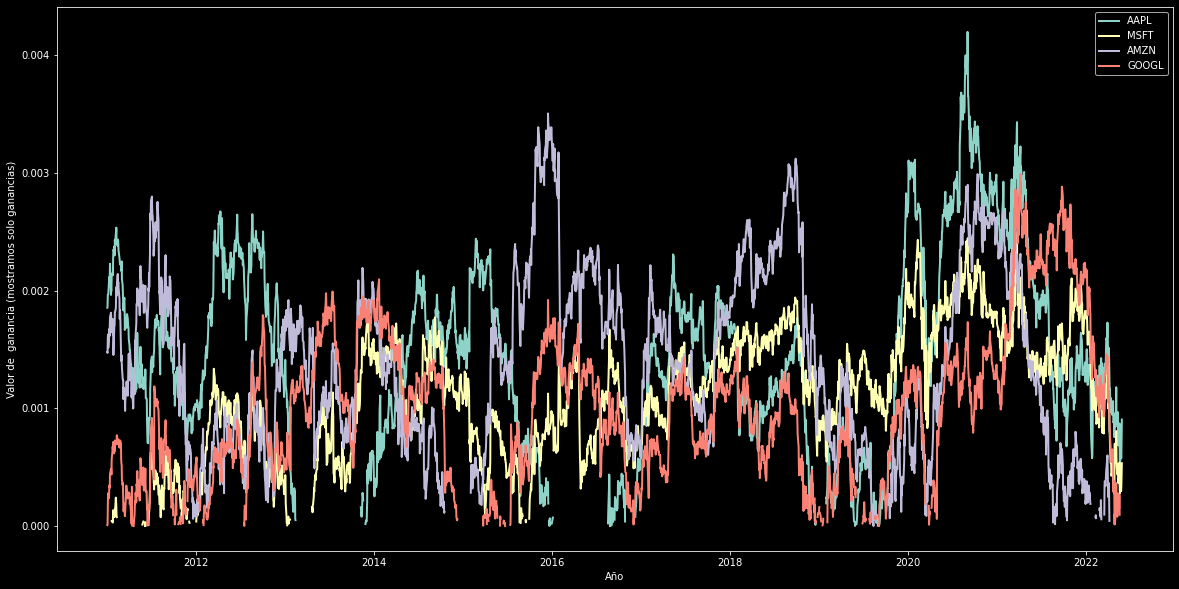

In [ ]:
#Mostramos en un Plot las ganancias
fig, ax = plt.subplots()
plt.xlabel("Año")   # Inserta el título del eje X
plt.ylabel("Valor de  ganancia (mostramos solo ganancias)") #Titulo del eje Y
plt.rcParams["figure.figsize"] = (40,10)
ax.plot(ganancias,linewidth=2.0)
plt.legend(['AAPL','MSFT','AMZN','GOOGL'])
plt.show()

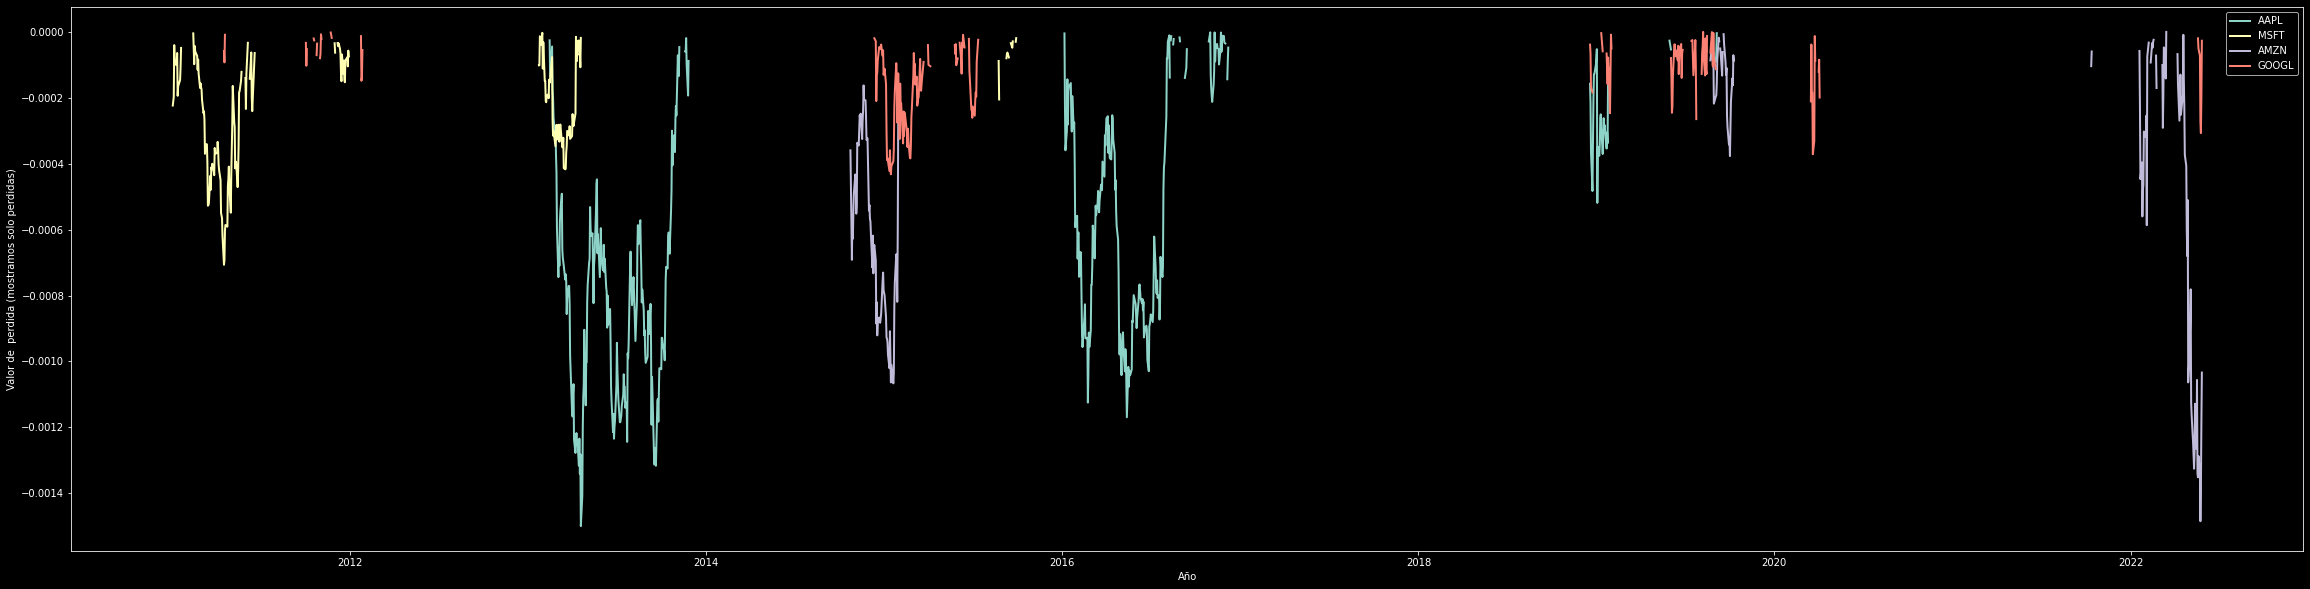

In [ ]:
#Mostramos en un plot las perdidas
fig, ax = plt.subplots()
plt.xlabel("Año")   # Inserta el título del eje X
plt.ylabel("Valor de  perdida (mostramos solo perdidas)") #Titulo del eje Y
ax.plot(perdidas,linewidth=2.0)
plt.legend(['AAPL','MSFT','AMZN','GOOGL'])
plt.show()

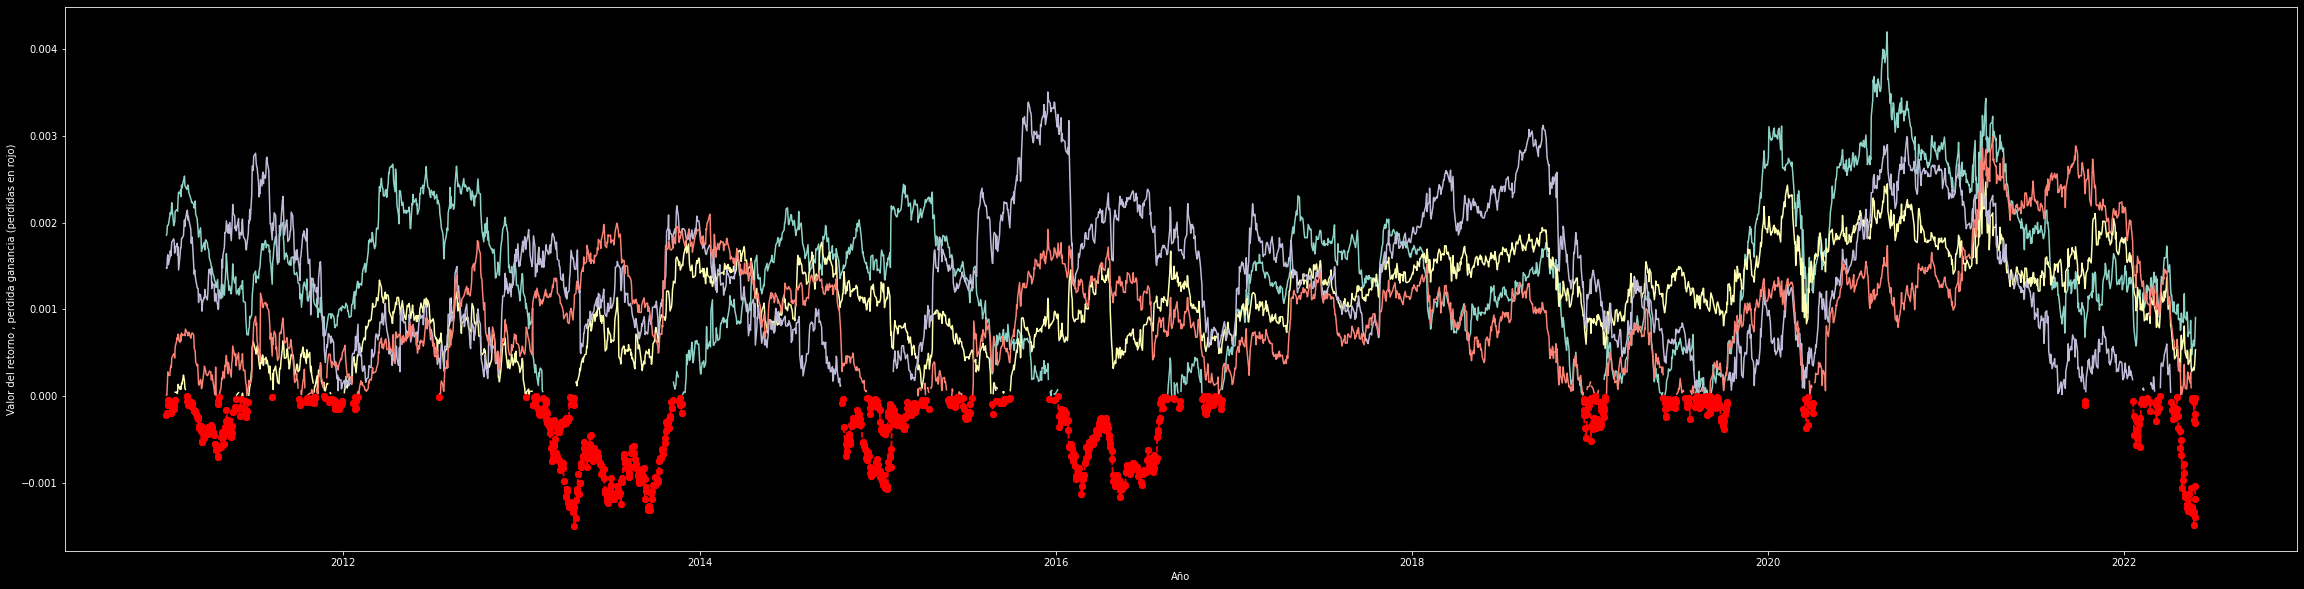

In [ ]:
plt.plot(ganancias)   # Dibuja el gráfico
plt.xlabel("Año")   # Inserta el título del eje X
plt.ylabel("Valor del retorno , perdida ganancia (perdidas en rojo)")   # Inserta el título del eje Y
plt.ioff()   # Desactiva modo interactivo de dibujo
plt.plot(perdidas, marker='o', linestyle='--', color='r')   
plt.ion()   
plt.plot(perdidas, marker='o', linestyle='--', color='r')   

In [ ]:
#De igual manera calculamos el VaR al 95%, 97.5% y 99.9% sobre nuestra ventana ya limpia 
x_var_roll_95 = np.percentile(roll,5) #alpha = 5%
print(x_var_roll_95)

x_var_roll_975 = np.percentile(roll,2.5) #alpha = 2.5%
print(x_var_roll_975)

x_var_roll_99 = np.percentile(roll,1) #alpha = 1%
print(x_var_roll_99)

#Y finalmente calculamos el CVaR de nuestra venta con los mismos niveles de confianza obteniendo la media de nuestro VaR en el horizonte de tiempo determinado
np.mean(roll[roll <= x_var_roll_95]) #alpha = 5%
np.mean(roll[roll <= x_var_roll_975]) #alpha = 2.5%
np.mean(roll[roll <= x_var_roll_99]) #alpha = 1%

-0.00022266653400321353
-0.0006300988599387169
-0.0009492960618508138


aapl    -0.001115
msft          NaN
amzn    -0.001173
googl         NaN
dtype: float64

In [ ]:
r253=rolling.aapl[253]
## para alpha=95%
v1=(r253-x_var_roll_95)
##para alpha=97.5%
v2=(r253-x_var_roll_975)
## para alpha=99%
v3=(r253-x_var_roll_99)
[v1,v2,v3]
## podemos notar que distan menos del 0.2%  y que el retorno es mayor para el VaR
## Por lo que diremos que ocurre una violación y es una buena estimación

[0.0021883800309630223, 0.0025958123568985258, 0.0029150095588106224]

In [ ]:
r254=rolling.aapl[254]
## para alpha=95%
v1_2=(r254-x_var_roll_95)
##para alpha=97.5%
v2_2=(r254-x_var_roll_975)
## para alpha=99%
v3_2=(r254-x_var_roll_99)
[v1_2,v2_2,v3_2]
## Nuevamente podemos notar que distan menos del 0.2%  y que el retorno es mayor para el VaR
## Por lo que diremos que ocurre una violación y es una buena estimación

## Por lo anterior decimos que ambos retornos son violaciones con cada significancia: alpha=0.95,0.975 y 0.99 


[0.0021925087837414803, 0.002599941109676984, 0.002919138311589081]

# Markowitz

In [ ]:
def pesosPortafolio(dataframe):
    array = []
    for i in dataframe.columns:
        array.append(1/len(dataframe.columns))
    arrayFinal = np.array(array)
    return arrayFinal
pesos = pesosPortafolio(returns_wlog)
pesos

array([0.25, 0.25, 0.25, 0.25])

In [ ]:
cov_matrix = returns_wlog.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix*252

,aapl,msft,amzn,googl
aapl,648.050113,113.132790,91.800061,130.293796
msft,113.132790,612.549548,107.414622,181.965454
amzn,91.800061,107.414622,668.360473,161.009033
googl,130.293796,181.965454,161.009033,704.378641


In [ ]:
num_portfolios = 10000
p_weights = []
p_ret = []
p_vol = []

for portfolio in range(num_portfolios):
    weights = np.random.random(len(mean_returns.values))
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, mean_returns.values) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(252) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(returns_wlog.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [ ]:
portfolios  = pd.DataFrame(data)
portfolios.head()

,Returns,Volatility,aapl weight,msft weight,amzn weight,googl weight
0,0.000989,16.606543,0.212721,0.168056,0.326021,0.293203
1,0.000965,17.231459,0.347476,0.181871,0.099027,0.371626
2,0.001041,17.158422,0.422595,0.377179,0.151014,0.049211
3,0.001086,17.701549,0.392908,0.054162,0.445702,0.107227
4,0.000981,16.275119,0.233884,0.253380,0.244007,0.268729


In [ ]:
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-0.05)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns          0.000783
Volatility      25.297385
aapl weight      0.003016
msft weight      0.032347
amzn weight      0.027593
googl weight     0.937043
Name: 8666, dtype: float64

In [ ]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(prices.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (returns_wlog.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(returns_wlog.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [ ]:
print("maximo sharpe ratio : {}".format(sharpe_arr.max()))

maximo sharpe ratio : 1.1453247545282952


In [ ]:
print("mayor indice : {} ".format(sharpe_arr.argmax()))

mayor indice : 2693 


In [ ]:
print(all_weights[2693,:])
max_sr_r = ret_arr[sharpe_arr.argmax()]
max_sr_v = vol_arr[sharpe_arr.argmax()]

[0.50682838 0.23638117 0.25000802 0.00678242]


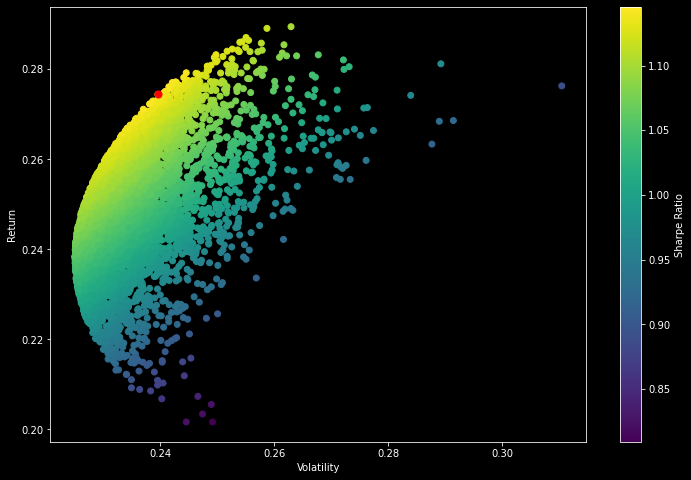

In [ ]:
plt.rcParams['axes.facecolor'] = 'black'
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_v, max_sr_r,c='red', s=50) # red dot
plt.show()

In [ ]:

def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(returns_wlog.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(returns_wlog.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [ ]:
cons  = ({'type':"eq","fun":check_sum})
bounds = ((0,1),(0,1),(0,1),(0,1))
init  = [0.25,0.25,0.25,0.25]

In [ ]:
from scipy.optimize import minimize


In [ ]:
opt_results = minimize(neg_sharpe,init,method='SLSQP', bounds=bounds,constraints=cons)
print(opt_results)

     fun: -1.145744185970374
     jac: array([-0.00039849,  0.00093406, -0.00010423,  0.05344404])
 message: 'Optimization terminated successfully.'
    nfev: 25
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.50120051, 0.24083545, 0.25796404, 0.        ])


<font size=5 face="Comic Sans MS,arial,verdana"><font color="red">rendimiento , volatilidad y sharpe ratio
</font></font>

In [ ]:
get_ret_vol_sr(opt_results.x)

array([0.27470531, 0.23976147, 1.14574419])

In [ ]:
frontier_y = np.linspace(0,0.3,400)

In [ ]:
def min_vol(weights):
  return get_ret_vol_sr(weights)[1]

In [ ]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(min_vol,init,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

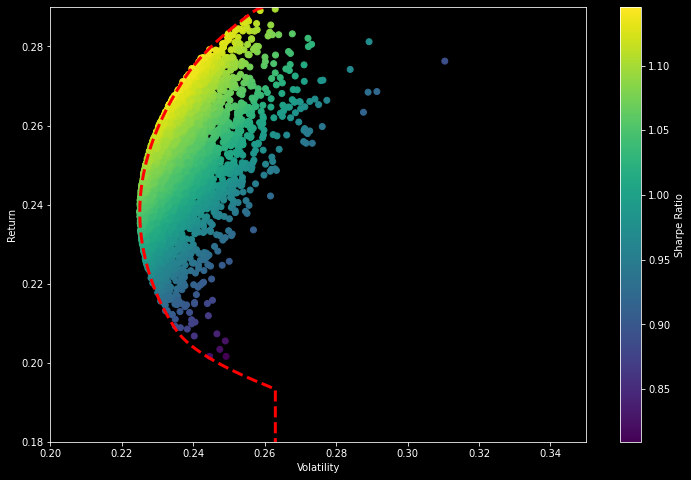

In [ ]:
plt.rcParams['axes.facecolor'] = 'black'
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.xlim(0.2,0.35)
plt.ylim(0.18,.29)
plt.show()

# Monte Carlo

In [ ]:
weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.3222502 , 0.21979384, 0.02618647, 0.43176949])

In [ ]:
exp_rtn = np.sum(returns_wlog.mean()*weight)*252

In [ ]:
exp_vol = np.sqrt(np.dot(weight.T, np.dot(returns_wlog.cov()*252, weight)))

In [ ]:
sharpe_ratio = exp_rtn / exp_vol

In [ ]:
sharpe_ratio

1.034176583506909

In [ ]:
n = 6000
 
weights = np.zeros((n, 4))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)
 
for i in range(n):
    weight = np.random.random(4)
    weight /= weight.sum()
    weights[i] = weight
     
    exp_rtns[i] = np.sum(returns_wlog.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(returns_wlog.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

In [ ]:
sharpe_ratios.max()

1.1439879215531423

In [ ]:
sharpe_ratios.argmax()

259

In [ ]:
weights[3153]

array([0.35030623, 0.31584274, 0.24088951, 0.09296152])

Text(0, 0.5, 'Expected Return')

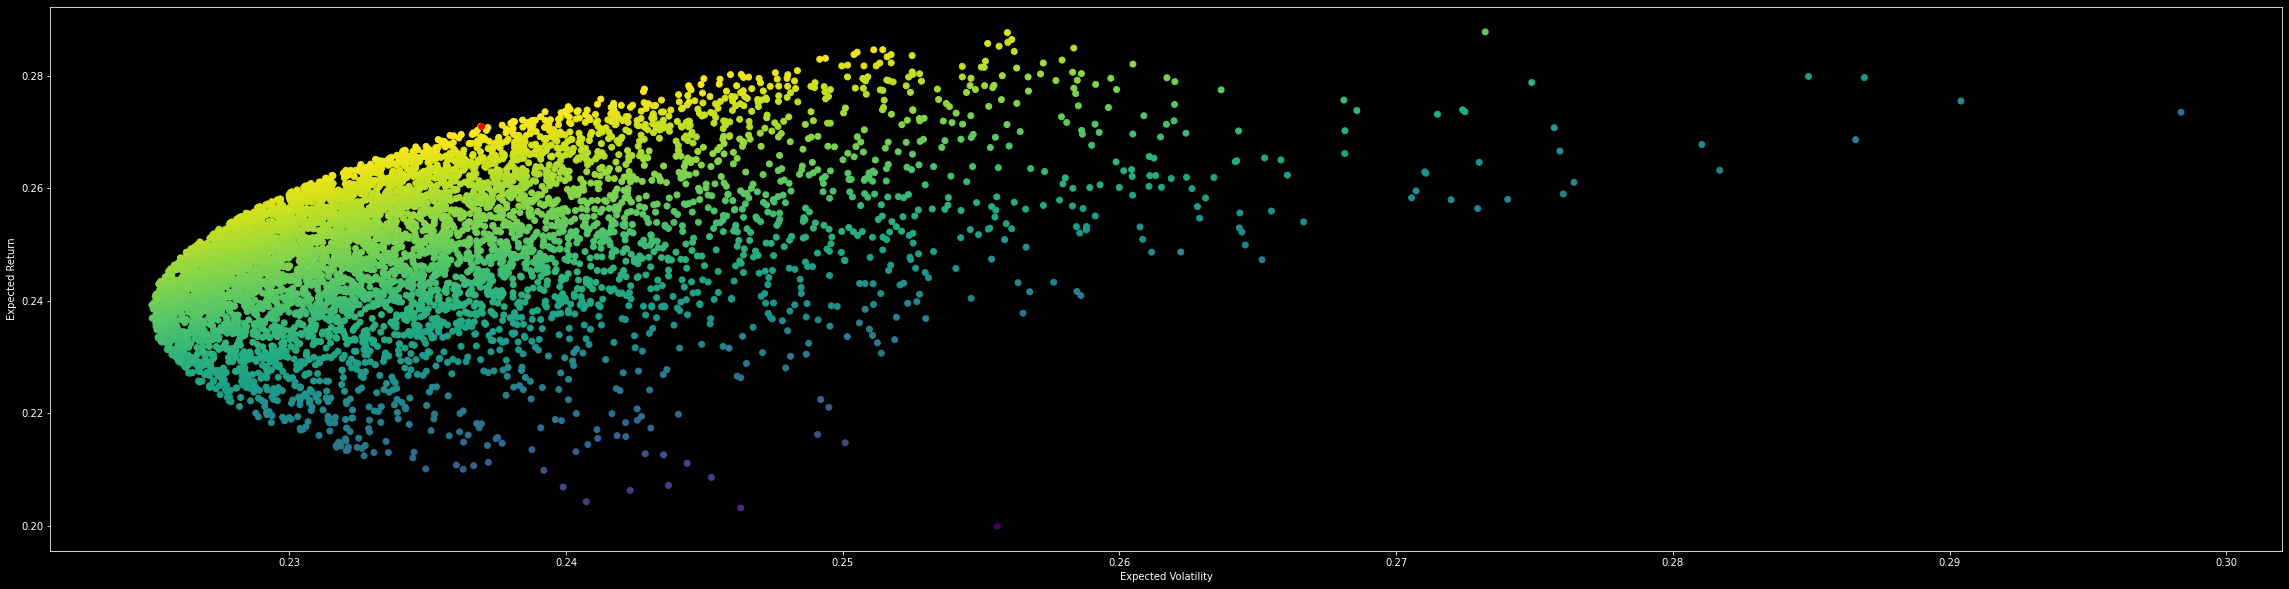

In [ ]:

fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')

In [ ]:
num_portfolios = 6000
r=0.0001
results = np.zeros((3+len(stocks_symbols),num_portfolios))
for i in range(num_portfolios):
    #Pesos
    weights = np.array(np.random.random(4))
    weights /= np.sum(weights)
 
    #Rendimiento y volatilidad
    portfolio_return = mean_returns.T.dot(weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
 
    #Resultados
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #Sharpe
    results[2,i] = (results[0,i]-r) / results[1,i]
    #Iteraciones
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

In [ ]:
results_frame = pd.DataFrame(results.T,columns=(['Rendimiento','SD','Sharpe']+list(returns_wlog.columns)))

In [ ]:
#Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['Sharpe'].idxmax()]
#Menor SD
min_vol_port = results_frame.iloc[results_frame['SD'].idxmin()]

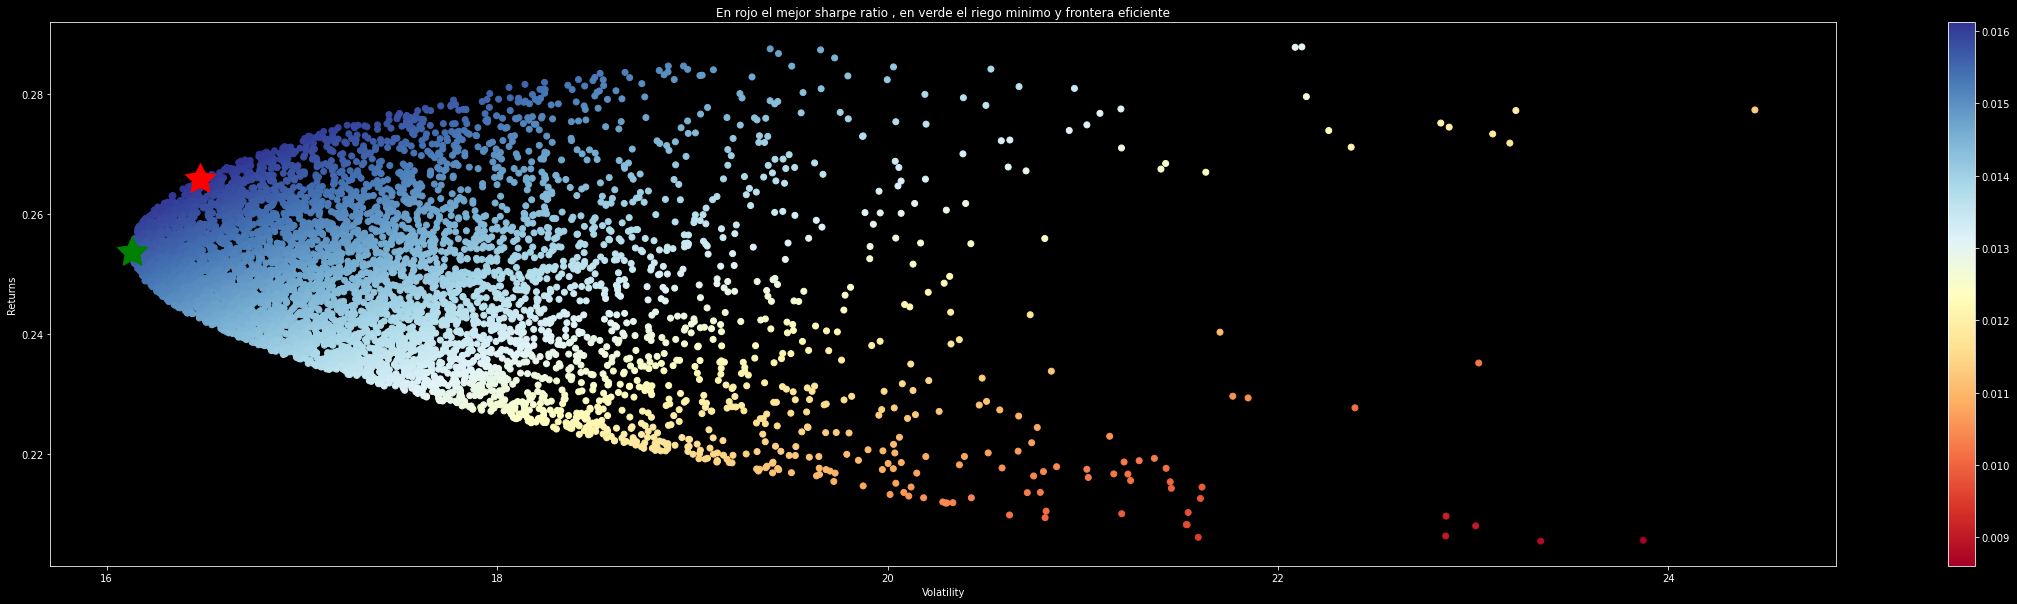

In [ ]:
plt.scatter(results_frame.SD,results_frame.Rendimiento,c=results_frame.Sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.title("En rojo el mejor sharpe ratio , en verde el riego minimo y frontera eficiente")
#Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000);
#Menor SD
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000);

In [ ]:
#pd.DataFrame(max_sharpe_port)
#pd.DataFrame(min_vol_port)

<font size=5 face="Comic Sans MS,arial,verdana"><font color="White">Prueba de pesos obtenidos entre los diferentes algoritmos
</font></font>

In [ ]:
monte=np.array([0.35030623, 0.31584274, 0.24088951, 0.09296152])
marko=np.array([0.50682838, 0.23638117, 0.25000802, 0.00678242])

In [ ]:
unidades=1000000

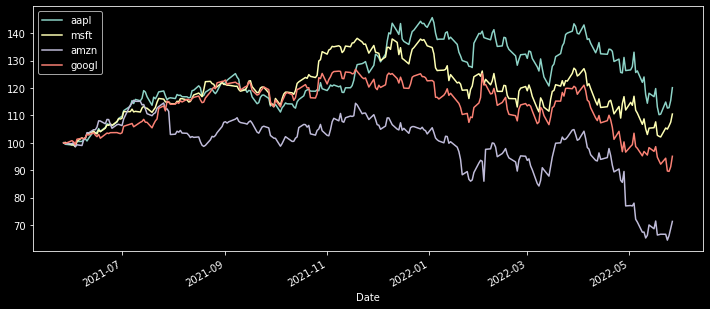

In [ ]:
prices2 = ffn.get('AAPL,MSFT,AMZN,GOOGL', start='2021-05-27')
benchmark = ffn.get('spy', start='2010-05-27')
ax = prices2.rebase().plot(figsize=(12,5))

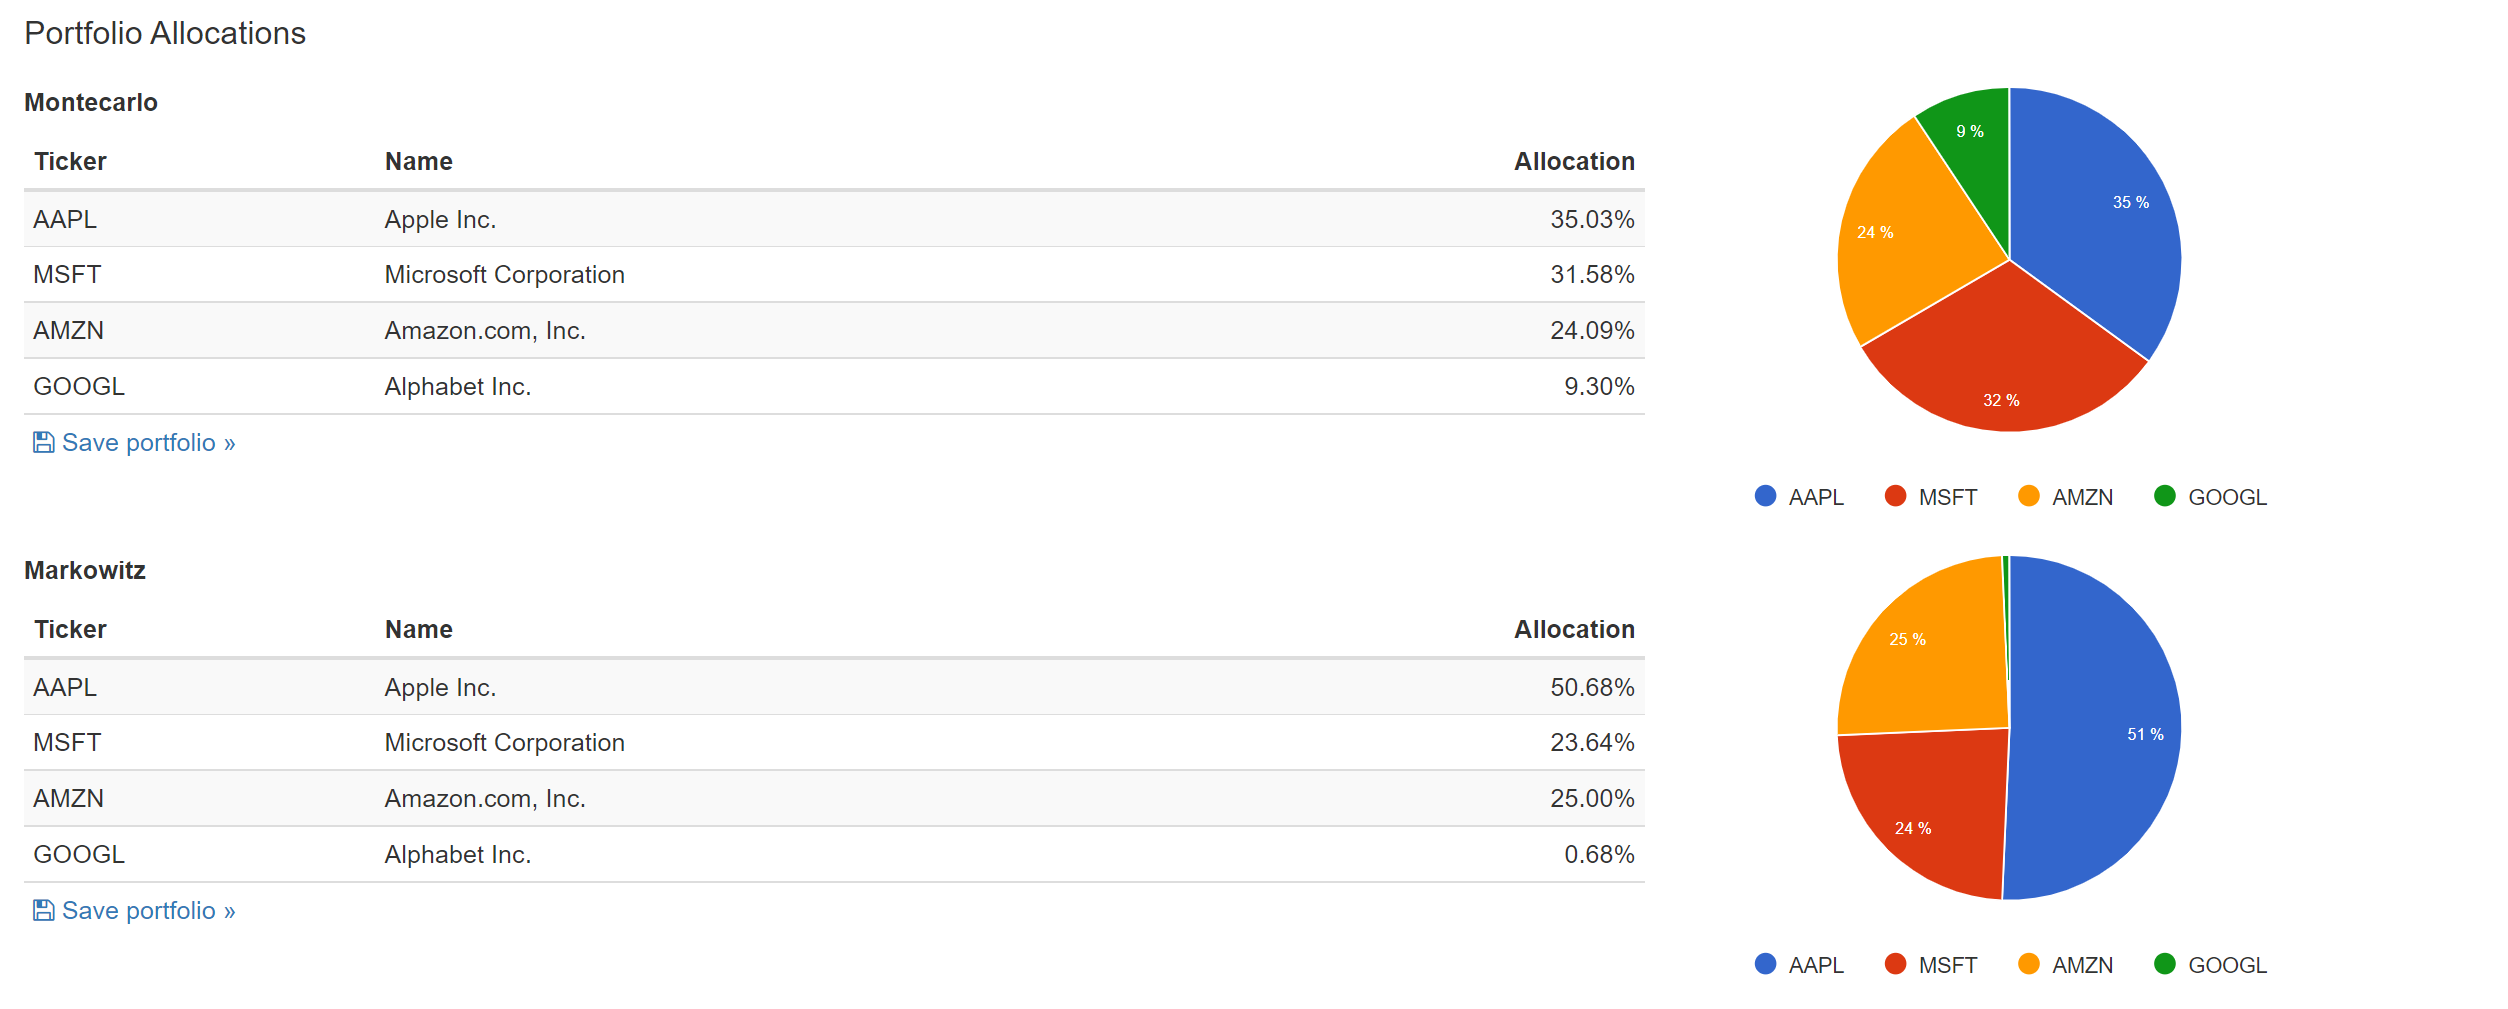

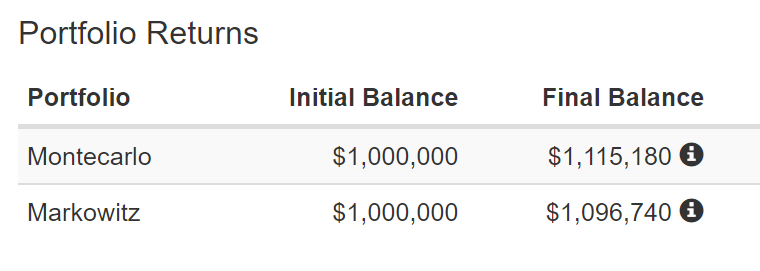

In [ ]:
import pandas_datareader
import datetime
import pandas as pd
import pandas_datareader.data as web
import plotly.graph_objects as go

In [ ]:

start = datetime.datetime(2021,5,20)
end = datetime.datetime(2022,5,20)
AAPL = web.DataReader('AAPL','yahoo',start,end)
MSFT = web.DataReader('MSFT','yahoo',start,end)
AMZN = web.DataReader('AMZN','yahoo',start,end)
GOOGL = web.DataReader('GOOGL','yahoo',start,end)

##Banchmark SPY for comparision
SPY = web.DataReader('SPY','yahoo',start,end)

In [ ]:

labels = ['AAPL','MSFT','AMZN','GOOGL']
allocation_pct = [0.35030623, 0.31584274, 0.24088951, 0.09296152]
fig = go.Figure(data=[go.Pie(labels=labels, values=allocation_pct)])
fig.update_layout(title="Portfolio Asset Allocation Montercarlo")
fig.show()

In [ ]:
for df in (AAPL,MSFT,AMZN,GOOGL,SPY): 
  df['Cum Return'] = df['Adj Close']/df.iloc[0]['Adj Close']

In [ ]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,Cum Return
Date,,,,,,,
2021-05-20,127.720001,125.099998,125.230003,127.309998,76857100.0,126.586777,1.000000
2021-05-21,128.000000,125.209999,127.820000,125.430000,79295400.0,124.717461,0.985233
2021-05-24,127.940002,125.940002,126.010002,127.099998,63092900.0,126.377975,0.998351
2021-05-25,128.320007,126.320000,127.820000,126.900002,72009500.0,126.179115,0.996780
2021-05-26,127.389999,126.419998,126.959999,126.849998,56575900.0,126.129395,0.996387


In [ ]:
init_investment = 1000000
for df, alloc in zip((AAPL,MSFT,AMZN,GOOGL),[0.35030623, 0.31584274, 0.24088951, 0.09296152]):
  df['Value'] = alloc*init_investment*df['Cum Return']

In [ ]:
SPY['SPY Total'] = init_investment*SPY['Cum Return']
SPY['SPY Total'] = round(SPY['SPY Total'])

In [ ]:
all_vals = [AAPL['Value'], MSFT['Value'], AMZN['Value'], GOOGL['Value']]
portfolio_val = pd.concat(all_vals, axis=1)
portfolio_val.columns = ['AAPL','MSFT','AMZN','GOOGL']

In [ ]:
portfolio_val['Portfolio Total'] = round(portfolio_val.sum(axis=1))
portfolio_val['Cum Return'] = portfolio_val['Portfolio Total']/portfolio_val.iloc[0]['Portfolio Total']

In [ ]:
portfolio_val['Cum Return %'] = (portfolio_val['Cum Return'] - 1) * 100
SPY['Cum Return %'] = (SPY['Cum Return'] - 1) * 100
SPY.tail()

,High,Low,Open,Close,Volume,Adj Close,Cum Return,SPY Total,Cum Return %
Date,,,,,,,,,
2022-05-16,403.970001,397.600006,399.980011,400.089996,78622400.0,400.089996,0.976100,976100.0,-2.389960
2022-05-17,408.570007,402.579987,406.529999,408.320007,83029700.0,408.320007,0.996179,996179.0,-0.382082
2022-05-18,403.799988,390.549988,403.500000,391.859985,117674500.0,391.859985,0.956022,956022.0,-4.397837
2022-05-19,394.140015,387.109985,388.619995,389.459991,98510700.0,389.459991,0.950166,950166.0,-4.983364
2022-05-20,397.029999,380.540009,393.250000,389.630005,131209600.0,389.630005,0.950581,950581.0,-4.941886


In [ ]:
# Visualize Portfolio Value and Compare it to SPY benchmark
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=portfolio_val.index, y=portfolio_val['Portfolio Total'], name='Portfolio Total'))
fig.add_trace(go.Scatter(x=SPY.index, y=SPY['SPY Total'],name='SPY Total'))
fig.update_layout(title="Portfolio Value")

In [ ]:
# Visualize Return %
fig = go.Figure()
fig.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['Cum Return %'], name='Portfolio Cumulative Return %'))
fig.add_trace(go.Scatter(x=SPY.index, y=SPY['Cum Return %'],name='SPY Cumulative Return %'))
fig.update_layout(title="Cumulative Return % (Portfolio vs SPY)")

In [ ]:
print("Portfolio Correlation with SPY")
round(portfolio_val['Portfolio Total'].corr(SPY['SPY Total']),2)

Portfolio Correlation with SPY


0.95

In [ ]:
# Visualize Value of Individual Stocks
fig = go.Figure()
fig.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['AAPL'], name='AAPL'))
fig.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['MSFT'],name='MSFT'))
fig.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['AMZN'],name='AMZN'))
fig.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['GOOGL'],name='GOOGL'))

In [ ]:
labels = ['AAPL','MSFT','AMZN','GOOGL']
allocation_pct = [0.50682838, 0.23638117, 0.25000802, 0.00678242]

fig = go.Figure(data=[go.Pie(labels=labels, values=allocation_pct)])
fig.update_layout(title="Portfolio Asset Allocation Markowitz")
fig.show()

In [ ]:
init_investment = 1000000
for df, alloc in zip((AAPL,MSFT,AMZN,GOOGL),[0.50682838, 0.23638117, 0.25000802, 0.00678242]):
  df['Value'] = alloc*init_investment*df['Cum Return']

In [ ]:
SPY['SPY Total'] = init_investment*SPY['Cum Return']
SPY['SPY Total'] = round(SPY['SPY Total'])

In [ ]:
all_vals = [AAPL['Value'], MSFT['Value'], AMZN['Value'], GOOGL['Value']]
portfolio_val = pd.concat(all_vals, axis=1)
portfolio_val.columns = ['AAPL','MSFT','AMZN','GOOGL']

In [ ]:
portfolio_val['Portfolio Total'] = round(portfolio_val.sum(axis=1))
portfolio_val['Cum Return'] = portfolio_val['Portfolio Total']/portfolio_val.iloc[0]['Portfolio Total']

In [ ]:
# Visualize Portfolio Value and Compare it to SPY benchmark
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=portfolio_val.index, y=portfolio_val['Portfolio Total'], name='Portfolio Total'))
fig.add_trace(go.Scatter(x=SPY.index, y=SPY['SPY Total'],name='SPY Total'))
fig.update_layout(title="Portfolio Value")

In [ ]:
print("Portfolio Correlation with SPY")
round(portfolio_val['Portfolio Total'].corr(SPY['SPY Total']),2)

Portfolio Correlation with SPY


0.9

In [ ]:
# Visualize Value of Individual Stocks
fig = go.Figure()
fig.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['AAPL'], name='AAPL'))
fig.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['MSFT'],name='MSFT'))
fig.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['AMZN'],name='AMZN'))
fig.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['GOOGL'],name='GOOGL'))